# Feature Engineering - StockPulse
In this notebook, we create new features from the cleaned stock data (cleaned_stocks.csv).  
These engineered features (returns, moving averages, volatility, etc.) will provide richer inputs for anomaly detection algorithms.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [13]:
df = pd.read_csv("../Data/processed/cleaned_stocks.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,123.330650,129.079567,122.443165,128.468194,112117500
2023-01-04,124.602699,126.870716,123.340502,125.125327,89113600
2023-01-05,123.281349,125.993105,123.024970,125.362006,80962700
2023-01-06,127.817383,128.478063,123.153167,124.257594,87754700
2023-01-09,128.339981,131.554654,128.083602,128.655538,70790800


In [14]:
df['Daily_Return'] = df['Close'].pct_change()


In [15]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


In [16]:
df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()
df['Volatility_30'] = df['Daily_Return'].rolling(window=30).std()


In [17]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()


In [18]:
df.dropna(inplace=True)


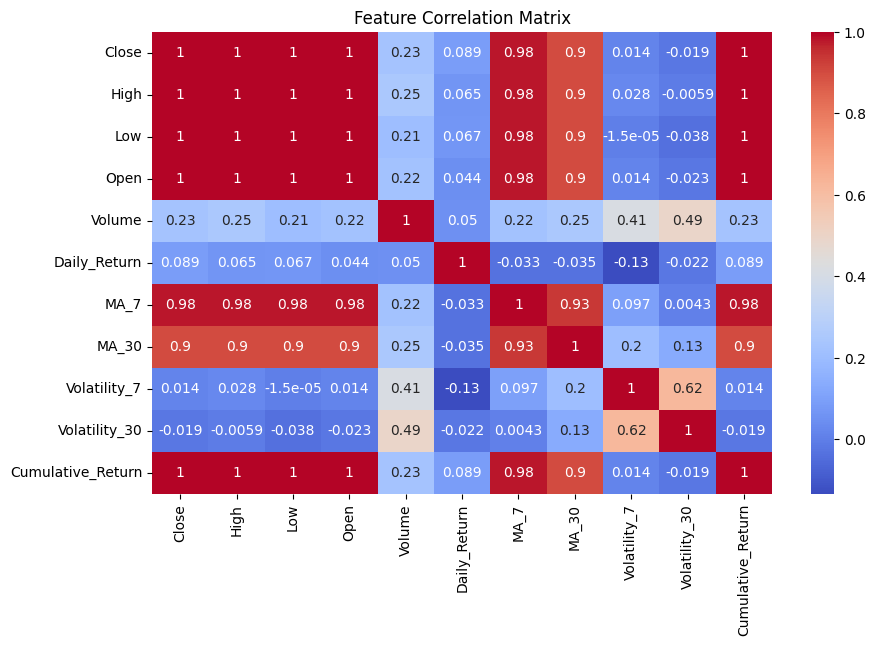

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [20]:
df.to_csv("../Data/processed/engineered_stocks.csv")


## Summary
- Created **Daily Returns** to capture short-term changes.  
- Added **Moving Averages (7-day, 30-day)** to identify long- vs. short-term trends.  
- Calculated **Volatility (7-day, 30-day)** to detect abnormal fluctuations.  
- Generated additional features like **Cumulative Return** for momentum analysis.  
- Stored processed dataset as `engineered_stocks.csv` for Feature Selection and Modeling.  
